# Object Detection  - YOLO & OWL-ViT
This tutorial demonstrates how to use YOLO (You Only Look Once) from the [Ultralytics](https://github.com/ultralytics/yolov5) library for object detection. It includes steps for:

- Running object detection inference on images/videos
- Fine-tuning YOLO for custom datasets
- Comparing YOLO with OWl-VIT for zero-shot learning.


## 1. Perform Object Detection Inference
First thing We'll use YOLOv8 from Ultralyics for object detection on a sample image.
We aim to utilize the pre-trained YOLOv8 model to detect objects in a sample image. This involves loading the model, providing an image for input, and interpreting the model's predictions.

**Key Concepts:**
- **Inference**: The process of using a trained model to make predictions on new data.
- **YOLOv8**: A state-of-the-art version of the YOLO (You Only Look Once) architecture, known for its speed and accuracy in object detection tasks.

**Steps:**
1. Load the YOLOv8 model using the Ultralytics library.
2. Perform inference on a sample image to detect objects.
3. Visualize the results, including bounding boxes and class labels.

**Support Material:**
- https://docs.ultralytics.com/models/yolov8/
- https://docs.ultralytics.com/tasks/detect/

In [ ]:
# Importiere die benötigten Bibliotheken
# YOLO: Das Objekterkennungsmodell von Ultralytics
# cv2: OpenCV für Bildverarbeitung (hier importiert, aber nicht aktiv genutzt)
from ultralytics import YOLO
import cv2

# Lade das vortrainierte YOLOv8 Modell
# 'yolov8n.pt' ist die "nano" Version - klein und schnell, gut für schnelle Inferenz
# Das Modell wurde bereits auf dem COCO-Dataset (80 Objektklassen) trainiert
model = YOLO('yolov8n.pt')

# Führe Objekterkennung auf einem Beispielbild durch
# Das Modell analysiert das Bild und erkennt Objekte wie Personen, Autos, etc.
# save=True speichert das Ergebnisbild mit eingezeichneten Bounding Boxes automatisch
results = model('images/street_scene.jpg', save=True)

# Gehe durch alle Erkennungsergebnisse (normalerweise ein Result-Objekt pro Bild)
for result in results:
    # Gib die erkannten Bounding Boxes aus
    # Jede Box enthält: Koordinaten (x, y, width, height), Konfidenzwert und Klassenbezeichnung
    print(result.boxes)  # Boxes-Objekt mit allen erkannten Objekten und ihren Positionen



image 1/1 /workspaces/B3-AP3-MultimodalInteraction_ObjDet/images/street_scene.jpg: 384x640 13 persons, 1 bicycle, 9 cars, 2 motorcycles, 1 traffic light, 1 bench, 4 birds, 1 handbag, 1 potted plant, 1755.6ms
Speed: 214.0ms preprocess, 1755.6ms inference, 338.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict8
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 2.,  0.,  0.,  0., 58.,  0.,  2.,  9.,  0., 14.,  0.,  3.,  0.,  1.,  2., 14., 14.,  2.,  0.,  2.,  2.,  0.,  0., 26.,  0.,  3.,  2.,  0.,  0.,  2., 14., 13.,  2.])
conf: tensor([0.9098, 0.9041, 0.9005, 0.8934, 0.8477, 0.8331, 0.8173, 0.7737, 0.7585, 0.7313, 0.6779, 0.6606, 0.6198, 0.5686, 0.5105, 0.5057, 0.5043, 0.4675, 0.4564, 0.4517, 0.4201, 0.4165, 0.4037, 0.4015, 0.3767, 0.3745, 0.3659, 0.3221, 0.3095, 0.3049, 0.2999, 0.2989, 0.2811])
data: tensor([[9.5592e-01, 3.6429e+02, 6.0592e+02, 6.1893e+02, 9.0984e-01, 2.0000e+00],
        [1.1789e+03, 4.2397e+02, 1.4806e+03, 8

## 2. Fine-Tuning YOLO on Custom Dataset
Fine-tuning YOLO requires a dataset formatted in the YOLO format. We'll use a small public dataset for demonstration.
We will adapt the pre-trained YOLO model to a custom dataset. This process, known as fine-tuning, enables YOLO to specialize in detecting specific objects not included in its original training.

**Key Concepts:**
- **Fine-tuning**: Adapting a pre-trained model to new data by continuing the training process.
- **Custom Dataset**: A dataset that contains specific objects relevant to a new application, different from those YOLO was trained on (e.g. https://docs.ultralytics.com/datasets/detect/signature/.) Does it work? yes, no? why not? what can you do?

**Steps:**
1. Prepare the custom dataset by organizing images and labels in the required format.
2. Configure the YOLO training pipeline.
3. Train the model and evaluate its performance.

**Support Material:** 
- https://docs.ultralytics.com/modes/train/
- https://docs.ultralytics.com/modes/val/




In [2]:
# Download a sample dataset (e.g., Signature)
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/signature.zip
!unzip -oq signature.zip -d ./datasets


In [3]:
# Trainiere das YOLO-Modell auf einem benutzerdefinierten Datensatz
# Dies ist der Fine-Tuning Prozess, bei dem das vortrainierte Modell 
# auf neue, spezifische Objektklassen spezialisiert wird

results = model.train(
    data='./datasets/signature.yaml',  # Pfad zur YAML-Konfigurationsdatei des Datensatzes
                                        # Enthält Pfade zu Trainings-/Validierungsbildern und Klassenbezeichnungen
    epochs=10,                          # Anzahl der Trainingsdurchläufe über den gesamten Datensatz
                                        # 10 Epochen = das Modell sieht jeden Trainingsdatensatz 10x
    imgsz=640,                          # Bildgröße in Pixeln (640x640)
                                        # Alle Bilder werden auf diese Größe skaliert
    batch=8                             # Batch-Größe: Anzahl der Bilder, die gleichzeitig verarbeitet werden
                                        # Kleinere Werte = weniger Speicher, aber langsameres Training
)

New https://pypi.org/project/ultralytics/8.3.237 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.10.19 torch-2.9.1+cu128 CPU (Intel Xeon Platinum 8370C 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/signature.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning /workspaces/B3-AP3-MultimodalInteraction_ObjDet/datasets/signature/labels/train.cache... 143 images, 0 backgrounds, 0 corrupt: 100%|██████████| 143/143 [00:00<?, ?it/s]
/home/vscode/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /workspaces/B3-AP3-MultimodalInteraction_ObjDet/datasets/signature/labels/val.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/home/vscode/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
       1/10         0G      2.111      4.472      2.204          7        640: 100%|██████████| 18/18 [01:10<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

                   all         35         35    0.00143      0.429       0.15      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.201      2.928      1.364          7        640: 100%|██████████| 18/18 [01:17<00:00,  4.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all         35         35    0.00314      0.943      0.116     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.6971       1.88      1.006          7        640: 100%|██████████| 18/18 [01:08<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         35         35       0.79      0.857      0.858      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.6509      1.583     0.9362          7        640: 100%|██████████| 18/18 [01:08<00:00,  3.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all         35         35          1      0.937      0.945      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.6236      1.397     0.9182          7        640: 100%|██████████| 18/18 [01:08<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         35         35          1       0.94      0.946      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.5209      1.302     0.8736          7        640: 100%|██████████| 18/18 [01:08<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all         35         35      0.997      0.943      0.983      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.5046      1.164     0.8704          7        640: 100%|██████████| 18/18 [01:07<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

                   all         35         35      0.997      0.943      0.983       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.4516       1.09     0.8382          7        640: 100%|██████████| 18/18 [01:07<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         35         35      0.969          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.4577      1.057     0.8479          7        640: 100%|██████████| 18/18 [01:07<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         35         35      0.996          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.4183      1.047     0.8278          7        640: 100%|██████████| 18/18 [01:07<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         35         35      0.968          1      0.994      0.929



10 epochs completed in 0.203 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.19 torch-2.9.1+cu128 CPU (Intel Xeon Platinum 8370C 2.80GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


                   all         35         35      0.968          1      0.994      0.929
Speed: 1.3ms preprocess, 80.8ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train3


## Evaluierung des Trainierten Modells

Nach dem Training über 10 Epochen zeigt das Modell folgende Performance-Metriken:

### Trainings-Metriken (letzte Epoche):
- **box_loss: 0.4183** - Verlust bei der Vorhersage der Bounding-Box-Koordinaten (niedrigerer Wert = bessere Lokalisierung)
- **cls_loss: 1.047** - Klassifikationsverlust (Fehler bei der Objektklassenerkennung)
- **dfl_loss: 0.8278** - Distribution Focal Loss für präzisere Bounding-Box-Regression
- **Instances: 7** - Anzahl der Objekte pro Batch während des Trainings
- **GPU_mem: 0G** - Kein GPU-Speicher verwendet (Training auf CPU)

### Validierungs-Metriken:
- **Precision (P): 0.968** - 96,8% der erkannten Signaturen sind tatsächlich Signaturen (wenige Fehlalarme)
- **Recall (R): 1.0** - 100% aller Signaturen im Datensatz wurden erkannt (keine verpassten Objekte)
- **mAP50: 0.994** - Mean Average Precision bei IoU=0.5 (nahezu perfekte Erkennungsgenauigkeit)
- **mAP50-95: 0.929** - Durchschnittliche Präzision über verschiedene IoU-Schwellenwerte (0.5 bis 0.95)

### Interpretation:
Das Modell zeigt **exzellente Performance** auf dem Signaturen-Datensatz mit nahezu perfekter Erkennung. Die hohen mAP-Werte deuten darauf hin, dass das Fine-Tuning sehr erfolgreich war.

In [5]:
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model, check the path depending on your output before!! # Hier das beste training einfügen

# Predict with the model
results = model.predict("images/example_signature.jpg", conf=0.75) #check params if you need to improve detection


image 1/1 /workspaces/B3-AP3-MultimodalInteraction_ObjDet/images/example_signature.jpg: 640x480 (no detections), 107.7ms
Speed: 4.2ms preprocess, 107.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


## 3. Zero-Shot Learning with OWL-ViT
Switch to `OWL-ViT` to see how it performs with zero-shot learning capabilities. Zero-shot means detecting objects without prior specific training.

OWL-ViT (Open Vocabulary Learning with Vision Transformers) is a cutting-edge model designed for open vocabulary object detection. Unlike traditional models, OWL-ViT combines vision transformers with text embeddings, enabling it to:\n\n
- Understand textual descriptions of objects, even if it hasn't seen them during training.
- Detect and classify objects based on descriptive input, making it suitable for diverse applications.
- Perform zero-shot learning by generalizing to new object classes without additional training.\n\n"

**Steps in Using OWL-ViT:**
1. Model Initialization**: Set up the OWL-ViT model.
2. Text Input for Object Descriptions: Provide descriptive prompts (e.g., 'a red car' or 'a black cat to guide detection.
3. Inference and Visualization: Process an image or video, detect objects based on text descriptions and visualize results.\n\n"

OWL-ViT excels in scenarios where predefined object classes are insufficient, such as detecting rare or domain-specific objects.

**Support Material**:
- https://huggingface.co/docs/transformers/en/model_doc/owlvit


In [29]:
# Importiere benötigte Bibliotheken für Visualisierung und Bildverarbeitung
import matplotlib.pyplot as plt  # Für die grafische Darstellung
import matplotlib.patheffects as pe  # Für Texteffekte (Umrandung)
from PIL import Image  # Für das Laden und Verarbeiten von Bildern
import torch  # PyTorch für Tensor-Operationen

# Importiere OWL-ViT Modell und Prozessor von HuggingFace Transformers
from transformers import OwlViTProcessor, OwlViTForObjectDetection

# Lade das Bild, das analysiert werden soll
image = Image.open("images/table_scene.jpeg")
#image = Image.open("images/street_scene.jpg")



# Lade den OWL-ViT Prozessor (bereitet Bild und Text für das Modell vor)
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")

# Lade das vortrainierte OWL-ViT Modell für Objekterkennung
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

# Definiere die zu suchenden Objekte als Textbeschreibungen
# Dies ist der Zero-Shot Ansatz: Das Modell wurde nicht auf diese spezifischen Objekte trainiert
text_labels = [["a person on the floor", "mobilephone"]]

# Bereite Eingaben vor: kombiniert Textbeschreibungen und Bild
# return_tensors="pt" gibt PyTorch Tensoren zurück
inputs = processor(text=text_labels, images=image, return_tensors="pt")

# Führe die Objekterkennung durch - das Modell sucht nach den beschriebenen Objekten
outputs = model(**inputs)

# Erstelle Tensor mit der Originalgröße des Bildes (Höhe, Breite)
# Wird benötigt, um die Bounding Boxes auf die richtige Größe zu skalieren
target_sizes = torch.tensor([(image.height, image.width)])

# Nachbearbeitung: Konvertiere Modell-Ausgaben in lesbare Bounding Boxes
# threshold=0.1 bedeutet: nur Erkennungen mit mindestens 10% Konfidenz behalten
# Format: Pascal VOC (xmin, ymin, xmax, ymax)
results = processor.post_process_grounded_object_detection(
    outputs=outputs, target_sizes=target_sizes, threshold=0.1, text_labels=text_labels
)

# Extrahiere die Ergebnisse für das erste (und einzige) Bild
result = results[0]
boxes, scores, text_labels = result["boxes"], result["scores"], result["text_labels"]

# Gebe alle erkannten Objekte mit ihren Details in der Konsole aus
for box, score, text_label in zip(boxes, scores, text_labels):
    box = [round(i, 2) for i in box.tolist()]  # Runde Koordinaten auf 2 Dezimalstellen
    print(f"Detected {text_label} with confidence {round(score.item(), 3)} at location {box}")


# Hilfsfunktion: Zeichnet ein einzelnes Rechteck (Bounding Box) auf das Bild
def show_box(box, ax):
    print(box)
    x0, y0 = box[0], box[1]  # Obere linke Ecke
    w, h = box[2] - box[0], box[3] - box[1]  # Berechne Breite und Höhe
    ax.add_patch(
        plt.Rectangle((x0, y0), w, h, edgecolor="green", facecolor=(0, 0, 0, 0), lw=2)
    )  # Grünes Rechteck ohne Füllung, Linienbreite 2


# Hauptfunktion: Zeigt das Bild mit allen erkannten Objekten und Beschriftungen
def show_boxes_and_labels_on_image(raw_image, boxes, labels, scores):
    plt.figure(figsize=(10, 10))  # Erstelle eine 10x10 Zoll große Abbildung
    plt.imshow(raw_image)  # Zeige das Originalbild
    
    # Durchlaufe alle erkannten Objekte
    for i, box in enumerate(boxes):
        box = [round(i, 2) for i in box.tolist()]
        show_box(box, plt.gca())  # Zeichne die Bounding Box
        
        # Füge Textbeschriftung oberhalb der Box hinzu
        plt.text(
            x=box[0],  # X-Position: linker Rand der Box
            y=box[1] - 12,  # Y-Position: 12 Pixel oberhalb der Box
            s=f"{labels[i]}: {scores[i]:,.4f}",  # Text: Label und Konfidenzwert
            c="beige",  # Textfarbe: beige
            path_effects=[pe.withStroke(linewidth=4, foreground="darkgreen")],  # Dunkelgrüne Umrandung
        )
    plt.axis("on")  # Zeige Achsen an
    plt.show()  # Zeige das fertige Bild an
    #plt.savefig("streetscene_with_detections.jpg")  # Optional: Speichere das Ergebnis


Detected mobilephone with confidence 0.161 at location [602.55, 791.94, 927.1, 950.07]


[602.55, 791.94, 927.1, 950.07]


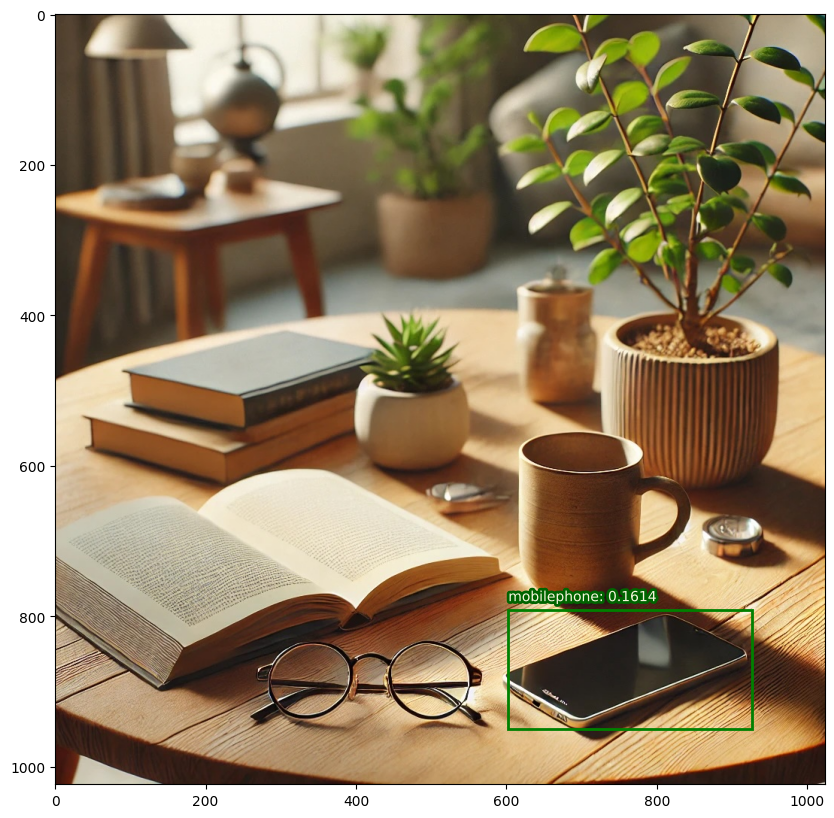

In [30]:
# Aktiviere die Inline-Darstellung von Matplotlib-Grafiken im Notebook
%matplotlib inline
# Zeige das finale Bild mit allen Erkennungen
show_boxes_and_labels_on_image(
    image,
    boxes,
    text_labels,
    scores)

# Speicherfunktion

✓ Bild erfolgreich gespeichert: output_images/owl_vit_detections.jpg


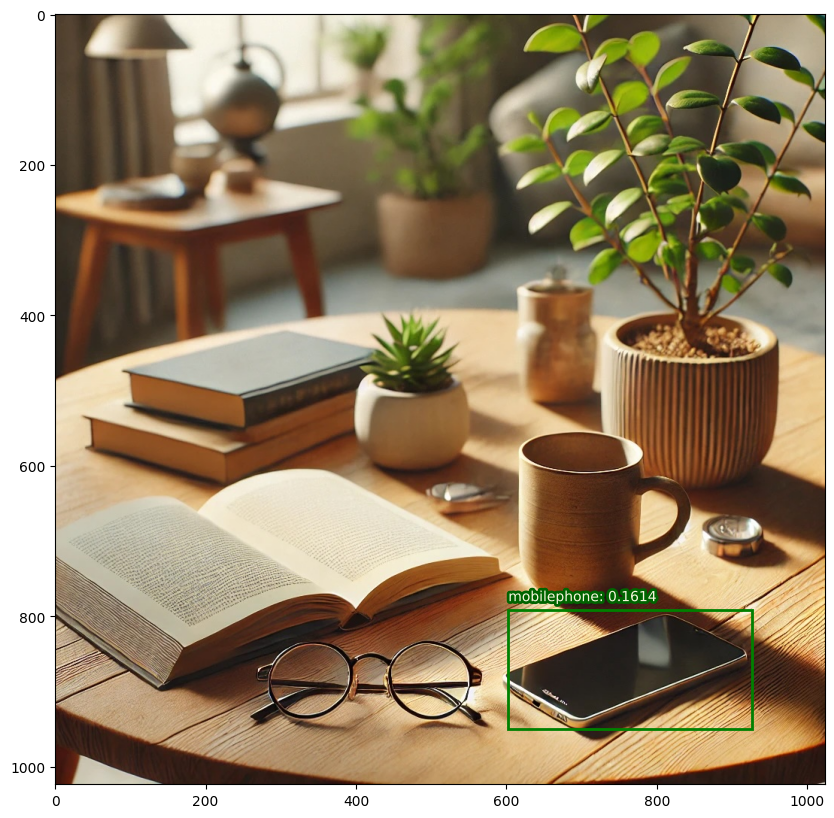

: 

In [ ]:
# Erstelle einen Ordner für die Ausgabebilder und speichere das Ergebnis
import os

# Definiere den Ordnernamen für die Ausgabe
output_folder = "output_images"

# Erstelle den Ordner, falls er noch nicht existiert
# exist_ok=True verhindert Fehler, falls der Ordner bereits vorhanden ist
os.makedirs(output_folder, exist_ok=True)

# Erstelle das Bild mit den Erkennungen und speichere es
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Zeichne alle Bounding Boxes und Beschriftungen
for i, box in enumerate(boxes):
    box_coords = [round(j, 2) for j in box.tolist()]
    x0, y0 = box_coords[0], box_coords[1]
    w, h = box_coords[2] - box_coords[0], box_coords[3] - box_coords[1]
    
    # Zeichne das Rechteck
    plt.gca().add_patch(
        plt.Rectangle((x0, y0), w, h, edgecolor="green", facecolor=(0, 0, 0, 0), lw=2)
    )
    
    # Füge die Beschriftung hinzu
    plt.text(
        x=x0,
        y=y0 - 12,
        s=f"{text_labels[i]}: {scores[i]:,.4f}",
        c="beige",
        path_effects=[pe.withStroke(linewidth=4, foreground="darkgreen")],
    )

plt.axis("on")

# Speichere das Bild im Ausgabeordner
output_path = os.path.join(output_folder, "owl_vit_detections.jpg")
plt.savefig(output_path, bbox_inches='tight', dpi=150)
print(f"✓ Bild erfolgreich gespeichert: {output_path}")

plt.show()